In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf

from glob import glob

In [24]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
        
train_path = './Datasets/WhiteHot(Dataset)/Training/'

In [25]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [27]:
for layer in inception.layers[:140]:
    layer.trainable = False
for layer in inception.layers[140:]:
    layer.trainable = True

In [28]:
# flattened = tf.keras.layers.Flatten()(inception.output)
# fc1 = tf.keras.layers.Dense(512, activation='relu', name="AddedDense1")(flattened)
# d = tf.keras.layers.Dropout(0.25)(fc1)
# fc2 = tf.keras.layers.Dense(256, activation='relu', name="AddedDense2")(d)
# d2=tf.keras.layers.Dropout(0.25)(fc2)
# fc3 = tf.keras.layers.Dense(1, activation='softmax', name="AddedDense3")(d2)
# model = tf.keras.models.Model(inputs=inception.input, outputs=fc3)


In [29]:
for i, layer in enumerate(inception.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 conv2d_94 False
2 batch_normalization_94 False
3 activation_94 False
4 conv2d_95 False
5 batch_normalization_95 False
6 activation_95 False
7 conv2d_96 False
8 batch_normalization_96 False
9 activation_96 False
10 max_pooling2d_4 False
11 conv2d_97 False
12 batch_normalization_97 False
13 activation_97 False
14 conv2d_98 False
15 batch_normalization_98 False
16 activation_98 False
17 max_pooling2d_5 False
18 conv2d_102 False
19 batch_normalization_102 False
20 activation_102 False
21 conv2d_100 False
22 conv2d_103 False
23 batch_normalization_100 False
24 batch_normalization_103 False
25 activation_100 False
26 activation_103 False
27 average_pooling2d_9 False
28 conv2d_99 False
29 conv2d_101 False
30 conv2d_104 False
31 conv2d_105 False
32 batch_normalization_99 False
33 batch_normalization_101 False
34 batch_normalization_104 False
35 batch_normalization_105 False
36 activation_99 False
37 activation_101 False
38 activation_104 False
39 activation_105 False
40 mixed

In [30]:
# useful for getting number of output classes
folders = glob('./Datasets/WhiteHot(Dataset)/Training/*')

In [31]:
len(folders)

2

In [32]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [33]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [34]:
# view the structure of the model
model.compile(optimizer='Adamax',  #Adamax , RMSprop , Adagrad, 
              loss='binary_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'])

print("model compiled")
print(model.summary())

model compiled
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
________________________________________________________________________

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 50

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.5,1.0],
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./Datasets/WhiteHot(Dataset)/Training/',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

test_set = validation_datagen.flow_from_directory('./Datasets/WhiteHot(Dataset)/Testing/',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'binary')

Found 1306 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [36]:
len(training_set)

27

In [37]:
training_set.class_indices

{'Fire': 0, 'No_Fire': 1}

In [38]:
imgs ,labels = next(training_set)

In [39]:
from matplotlib import pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

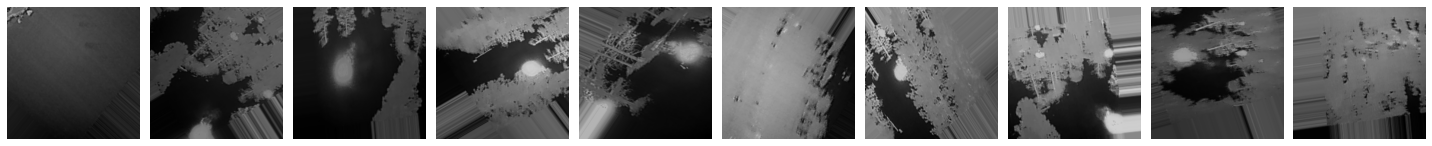

[1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0.]


In [40]:
plotImages(imgs)
print(labels)

In [41]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_IncepV3_WH_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [42]:
history = model.fit(training_set,
          steps_per_epoch= 1000 // batch_size,
          epochs=10, 
          validation_data=test_set,
          validation_steps= 200 // batch_size,
          callbacks=callbacks_list)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.9215 - auc: 0.9510 - precision: 0.8736 - recall: 0.8582
Epoch 00001: val_accuracy improved from -inf to 0.45500, saving model to .\FirevsNonFire_IncepV3_WH_transfer_learning_model_weights-improvement-01-0.46.hdf5
20/20 [==============================] - 139s 7s/step - loss: 0.3448 - accuracy: 0.9215 - auc: 0.9510 - precision: 0.8736 - recall: 0.8582 - val_loss: 19.5427 - val_accuracy: 0.4550 - val_auc: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9874 - auc: 0.9996 - precision: 0.9719 - recall: 0.9858
Epoch 00002: val_accuracy did not improve from 0.45500
20/20 [==============================] - 141s 7s/step - loss: 0.0341 - accuracy: 0.9874 - auc: 0.9996 - precision: 0.9719 - recall: 0.9858 - val_loss: 12.6213 - val_accuracy: 0.4500 - val_auc: 0.5091 - val_precision: 0.0000e+00 - val_recall: 0.0

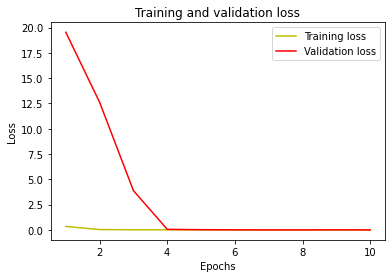

In [43]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

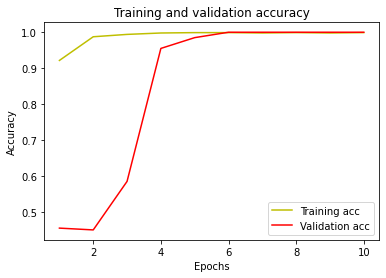

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()